# Competição ML @SBS/DAA - 4ª Edição (2021/2022)
Esta competição está relacionada com o Trabalho Prático de Grupo das UCs do perfil Machine Learning: Fundamentos e Aplicações da Uminho e da UC Dados e Aprendizagem Automática, tendo, como destinatários, alunos do Mestrado em Engenharia Informática, do Mestrado em Matemática e Computação, e do Mestrado em Engenharia de Sistemas.

# Descrição da Competição
A modelação do fluxo de tráfego rodoviário é um conhecido problema de características estocásticas, não-lineares. Tem, contudo, aparecido na literatura um conjunto de modelos que demonstram um potencial assinalável neste tipo de previsões. Com isso em consideração, foi construído um *dataset* que contém dados referentes ao tráfego de veículos na cidade do Porto durante um período superior a 1 ano. O *dataset* cobre um período que vai desde o dia 24 de julho de 2018 até ao dia 02 de outubro de 2019.

Com esta competição espera-se que os alunos desenvolvam e otimizem modelos de *Machine Learning* que sejam capazes de prever o fluxo de tráfego rodoviário, numa determinada hora, na cidade do Porto.

In [1]:
!pip install kaggle

In [2]:
#!kaggle competitions download -c tpsbsdaa2122

In [111]:

import pandas as pd
import seaborn as sns
import numpy as np
import re
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

## Load do *dataset* 

In [112]:
training_file = 'Datasets/training_data.csv'
test_file = 'Datasets/test_data.csv'

df = pd.read_csv(training_file,encoding = "ISO-8859-1")
df_test = pd.read_csv(test_file,encoding = "ISO-8859-1")

In [113]:
df_test

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,NaN
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,NaN
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0.0,NaN
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NaN
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,0.0,chuva fraca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Porto,2018-11-24 05:00:00,50.2,1.1,80.5,DARK,11.0,1013.0,100.0,5.0,NaN,0.0,chuva fraca
1496,Porto,2019-03-01 02:00:00,38.0,4.6,85.6,DARK,9.0,1028.0,100.0,0.0,NaN,0.0,NaN
1497,Porto,2018-09-05 01:00:00,43.8,0.0,80.4,DARK,16.0,1013.0,100.0,1.0,NaN,0.0,NaN
1498,Porto,2018-11-05 08:00:00,46.0,83.2,83.2,LIGHT,10.0,1004.0,87.0,5.0,NaN,0.0,chuva moderada


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [115]:
df.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


Comparando os valores *max* de cada feature com os valores *mean* observamos uma grande discrepância entre o valor médio de *AVERAGE_TIME_DIFF* e o valor máximo desta *feature*. Pode ser que estejamos perante *outliers*.

In [116]:
df.columns

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

## Features
* **city_name** - nome da cidade em causa;
* **record_date** - o timestamp associado ao registo;
* **average_speed_diff** - a diferença de velocidade corresponde à diferença entre (1.) a velocidade máxima que os carros podem atingir em cenários sem trânsito e (2.) a velocidade que realmente se verifica. Quanto mais alto o valor, maior é a diferença entre o que se está a andar no momento e o que se deveria estar a andar sem trânsito, i.e., valores altos deste atributo implicam que se está a andar mais devagar;
* **average_free_flow_speed** - o valor médio da velocidade máxima que os carros podem atingir em cenários sem trânsito;
* **average_time_diff** - o valor médio da diferença do tempo que se demora a percorrer um determinado conjunto de ruas. Quanto mais alto o valor maior é a diferença entre o tempo que demora para se percorrer as ruas e o que se deveria demorar sem trânsito, i.e., valores altos implicam que se está a demorar mais tempo a atravessar o conjunto de ruas;
* **average_free_flow_time** - o valor médio do tempo que demora a percorrer um determinado conjunto de ruas quando não há trânsito;
* **luminosity** - o nível de luminosidade que se verificava na cidade do Porto;
* **average_temperature - o valor médio da temperatura para o record_date na cidade do Porto;
* **average_atmosp_pressure** - o valor médio da pressão atmosférica para o record_date;
* **average_humidity** - o valor médio da humidade para o record_date;
* **average_wind_speed** - o valor médio da velocidade do vento para o record_date;
* **average_cloudiness** - o valor médio da percentagem de nuvens para o record_date;
* **average_precipitation** - o valor médio de precipitação para o record_date;
* **average_rain** - avaliação qualitativa da precipitação para o record_date.

In [117]:
print(df.count())

city_name                  6812
record_date                6812
AVERAGE_SPEED_DIFF         6812
AVERAGE_FREE_FLOW_SPEED    6812
AVERAGE_TIME_DIFF          6812
AVERAGE_FREE_FLOW_TIME     6812
LUMINOSITY                 6812
AVERAGE_TEMPERATURE        6812
AVERAGE_ATMOSP_PRESSURE    6812
AVERAGE_HUMIDITY           6812
AVERAGE_WIND_SPEED         6812
AVERAGE_CLOUDINESS         4130
AVERAGE_PRECIPITATION      6812
AVERAGE_RAIN                563
dtype: int64


In [118]:
print(df.isna().sum())

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64


<AxesSubplot:>

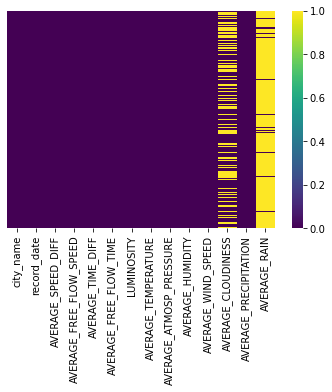

In [119]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

Verificamos que quase todos os valores de *AVERAGE_RAIN* são nulos e que existe uma percentagem significativa de valores nulos de *AVERAGE_CLOUDINESS*.

In [120]:
print(df.LUMINOSITY.unique())
print(df.AVERAGE_CLOUDINESS.unique())
print(df.city_name.unique())
print(df.AVERAGE_RAIN.unique())
print(df.AVERAGE_PRECIPITATION.unique())
print(df.record_date.unique())

['LIGHT' 'LOW_LIGHT' 'DARK']
[nan 'céu claro' 'nuvens dispersas' 'céu pouco nublado' 'céu limpo'
 'algumas nuvens' 'nuvens quebrados' 'tempo nublado' 'nuvens quebradas'
 'nublado']
['Porto']
[nan 'chuva fraca' 'chuva' 'chuva leve' 'chuvisco fraco' 'chuva moderada'
 'trovoada com chuva leve' 'aguaceiros' 'aguaceiros fracos'
 'chuva de intensidade pesada' 'trovoada com chuva'
 'chuva de intensidade pesado' 'chuva forte' 'chuvisco e chuva fraca']
[0.]
['2019-08-29 07:00:00' '2018-08-10 14:00:00' '2019-09-01 16:00:00' ...
 '2018-10-02 04:00:00' '2019-01-30 01:00:00' '2019-06-15 21:00:00']


Verifica-se que existem categorias nas *features* ***AVERAGE_CLOUDINESS*** e ***AVERAGE_PRECIPITATION*** que dizem respeito exatamente à mesma coisa.  

***AVERAGE_CLOUDINESS***
* 'nuvens quebradas' é o mesmo que 'nuvens quebrados'
* 'tempo nublado' é o mesmo que 'nublado'

***AVERAGE_PRECIPITATION***
* 'chuva intensidade pesada' é o mesmo que 'chuva intensidade pesado'
* etc.


In [121]:
for c in df.columns:
    valores_unicos = df[c].unique()
    if len(valores_unicos) < 10:
        print(f'{c} : {valores_unicos}')

city_name : ['Porto']
AVERAGE_SPEED_DIFF : ['Medium' 'High' 'None' 'Low' 'Very_High']
LUMINOSITY : ['LIGHT' 'LOW_LIGHT' 'DARK']
AVERAGE_PRECIPITATION : [0.]


Verifica-se que as *features* ***LUMINOSITY***, ***AVERAGE_CLOUDINESS***, ***AVERAGE_RAIN*** e ***AVERAGE_PRECIPITATION***, apesar de possuírem dados categóricos, estes têm uma ordem implícita entre si. 

## Exploração de dados

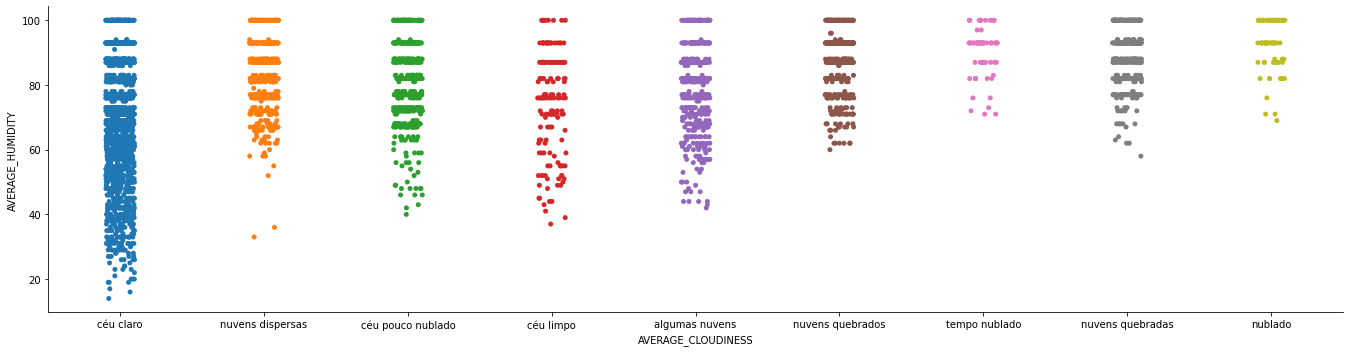

In [122]:
sea = sns.catplot(data=df, y="AVERAGE_HUMIDITY", x="AVERAGE_CLOUDINESS")
sea.fig.set_figwidth(22)
sea.fig.set_figheight(5)

<AxesSubplot:xlabel='AVERAGE_TIME_DIFF'>

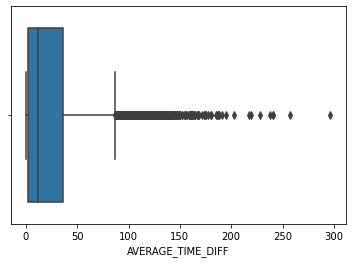

In [123]:
sns.boxplot(x=df['AVERAGE_TIME_DIFF'])

<AxesSubplot:xlabel='AVERAGE_TIME_DIFF'>

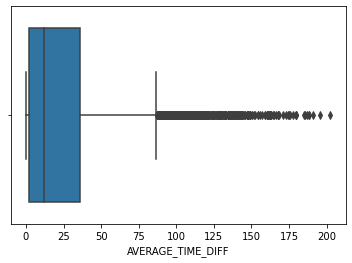

In [124]:
outliers = df[df['AVERAGE_TIME_DIFF'] > 205]
outliers_indexes = list(outliers.index)
df2 = df.drop(outliers_indexes)

sns.boxplot(x = df2['AVERAGE_TIME_DIFF'])

<AxesSubplot:xlabel='AVERAGE_TEMPERATURE'>

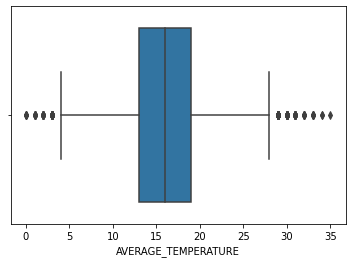

In [125]:
sns.boxplot(x=df['AVERAGE_TEMPERATURE'])

<AxesSubplot:xlabel='AVERAGE_FREE_FLOW_SPEED'>

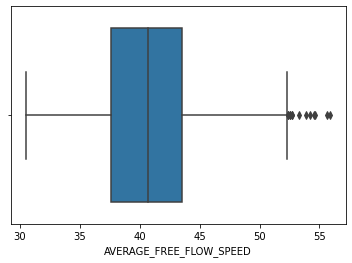

In [126]:
sns.boxplot(x=df['AVERAGE_FREE_FLOW_SPEED'])

<AxesSubplot:xlabel='AVERAGE_FREE_FLOW_TIME'>

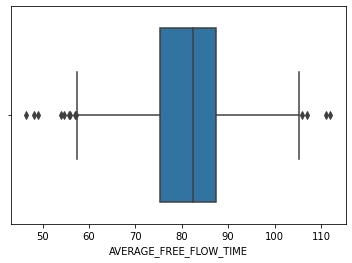

In [127]:
sns.boxplot(x=df['AVERAGE_FREE_FLOW_TIME'])

In [128]:
cols = ['AVERAGE_SPEED_DIFF', 'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED']

#sns.pairplot(df[cols],hue='AVERAGE_SPEED_DIFF', height=2.5)

## Verificar quais dos valores de cloudiness dizem respeito à mesma coisa

In [129]:
cols = ['AVERAGE_SPEED_DIFF', 'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED','AVERAGE_CLOUDINESS']
colunas_a_analisar = df[cols]

#df['AVERAGE_CLOUDINESS'] = pd.Categorical(df['AVERAGE_CLOUDINESS'])    
#sns.pairplot(colunas_a_analisar[df['AVERAGE_CLOUDINESS'].isin(['céu limpo','céu claro'])],hue='AVERAGE_CLOUDINESS', height=2.5)

In [130]:
df['AVERAGE_CLOUDINESS'] = pd.Categorical(df['AVERAGE_CLOUDINESS'])    
#sns.pairplot(colunas_a_analisar[df['AVERAGE_CLOUDINESS'].isin(['nuvens quebradas','nuvens quebrados'])],hue='AVERAGE_CLOUDINESS', height=2.5)

In [131]:
#df['AVERAGE_CLOUDINESS'] = pd.Categorical(df['AVERAGE_CLOUDINESS'])    
#sns.pairplot(colunas_a_analisar[df['AVERAGE_CLOUDINESS'].isin(['tempo nublado','nublado'])],hue='AVERAGE_CLOUDINESS', height=2.5)

In [132]:
#sns.pairplot(colunas_a_analisar,hue='AVERAGE_CLOUDINESS', height=2.5)

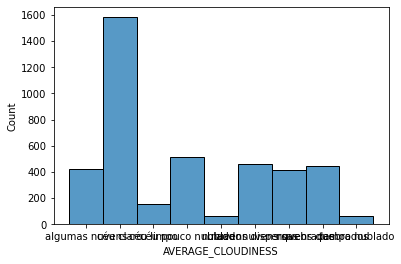

In [133]:
#bigFig()
sea = sns.histplot(data=df, x="AVERAGE_CLOUDINESS")

In [134]:
aux = df[['AVERAGE_HUMIDITY','AVERAGE_CLOUDINESS']].groupby(by='AVERAGE_CLOUDINESS').mean()
#for col in aux.columns:
#    aux[col] = aux[col].std()
aux

,AVERAGE_HUMIDITY
AVERAGE_CLOUDINESS,
algumas nuvens,79.559242
céu claro,68.646018
céu limpo,74.457516
céu pouco nublado,81.321705
nublado,92.522388
nuvens dispersas,82.978214
nuvens quebradas,90.324519
nuvens quebrados,87.668527
tempo nublado,90.194030


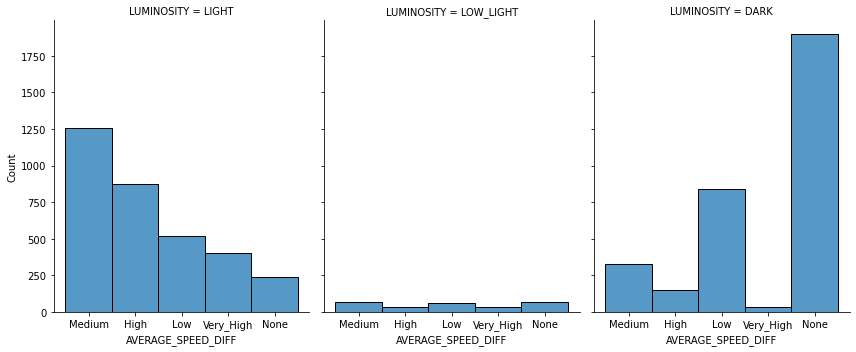

In [135]:
# Visualizar o impacto da luminosity no trânsito
#df['AVERAGE_SPEED_DIFF'] = pd.Categorical(df['AVERAGE_SPEED_DIFF'], ["None", "Low", "Medium", "High", "Very_High"])    
    
sea = sns.FacetGrid(df, col = "LUMINOSITY", margin_titles = True)
sea.fig.set_figwidth(12)
sea.fig.set_figheight(5)
sea.map(sns.histplot, 'AVERAGE_SPEED_DIFF')

In [136]:
df.groupby(by='AVERAGE_CLOUDINESS').mean()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
AVERAGE_CLOUDINESS,,,,,,,,
algumas nuvens,40.317062,28.581280,85.194550,14.528436,1017.426540,79.559242,3.000000,0.0
céu claro,40.916245,21.194058,85.894753,16.430152,1019.362200,68.646018,2.642857,0.0
céu limpo,39.433333,18.552288,75.352288,13.640523,1015.405229,74.457516,2.156863,0.0
céu pouco nublado,39.159690,36.191085,78.501938,18.063953,1017.211240,81.321705,3.228682,0.0
nublado,41.559701,20.165672,76.264179,16.208955,1017.029851,92.522388,2.492537,0.0
nuvens dispersas,39.807190,28.123747,80.128105,14.729847,1016.862745,82.978214,3.248366,0.0
nuvens quebradas,39.779327,29.250962,79.117548,16.689904,1016.620192,90.324519,2.915865,0.0
nuvens quebrados,41.283036,22.461830,81.527232,14.119420,1017.587054,87.668527,3.330357,0.0
tempo nublado,40.935821,14.361194,82.831343,14.417910,1018.268657,90.194030,3.074627,0.0


## Tratamento de dados

### Transformarção de dados categóricos em ordinais

In [137]:
def categorical_to_ordinal(df):
    df['LUMINOSITY'].replace({"DARK": 0, "LOW_LIGHT": 1, "LIGHT": 2}, inplace=True)     
    df['AVERAGE_CLOUDINESS'].replace({"céu limpo": 0, "céu claro": 1, "nuvens dispersas": 2,"nuvens quebrados": 3,"nuvens quebradas": 3,"algumas nuvens": 4,"céu pouco nublado":5,'tempo nublado': 6,'nublado': 6}, inplace=True) 
    if 'AVERAGE_SPEED_DIFF' in df:
        df['AVERAGE_SPEED_DIFF'].replace({"None": 0, "Low": 1, "Medium": 2, "High": 3, "Very_High": 4}, inplace=True)
    return df

### Tratamento do campo 'record_date'

In [138]:
#Identificação de partes do dia (transformação da hora num dado categórico)
def daypart(hour):
    if hour > 0 and hour < 7:
        return "dawn"
    elif hour >= 7 and hour <= 10:
        return "early morning"
    elif hour > 10 and hour < 12:
        return "late morning"
    elif hour >= 12 and hour <= 14:
        return "lunch"
    elif hour > 14 and hour < 17:
        return "early afternoon"
    elif hour >= 17 and hour <= 20:
        return "late afternoon"
    elif hour > 20 and hour < 22:
        return "evening"
    else:
        return "midnight"
    
def is_weekend(day_name):
    if day_name == 'Saturday' or day_name == 'Sunday':
        return 1
    else:
        return 0

def is_friday(day_name):
    if day_name == 'Friday':
        return 1
    else:
        return 0 
    
def season(month):
    if month > 3 and month < 6:
        return "spring"
    elif month >= 6 and month <= 9:
        return "summer"
    elif month > 9 and month < 12:
        return "fall"
    else:
        return "winter"

# Função principal que trata do campo 'record_date'
# Passam a existir colunas que identificam a altura do dia, a estação do ano, bem como se é ou não fim-de-semana/sexta-feira/quinta-feira
def handle_date(df):
    if 'Is_weekend' not in df:
        df.record_date = pd.to_datetime(df.record_date)
        df['Month'] = df.record_date.dt.month
        df['Hour'] = df.record_date.dt.hour
        df['Day_name'] = df.record_date.dt.day_name()
        df['Day_Part'] = df['Hour'].apply(daypart)
        df['Is_weekend'] = df['Day_name'].apply(is_weekend)
        df['Is_friday'] = df['Day_name'].apply(is_friday)
        df['Season'] = df['Month'].apply(season)
        one_hot_dates = pd.get_dummies(df['Day_Part'])
        #one_hot_seasons = pd.get_dummies(df['Season'])
        df = pd.concat([df, one_hot_dates], axis=1)
        df = df.drop(['Month', 'Hour', 'Day_name', 'Day_Part', 'Season', 'record_date'],axis=1)
    return df
        

### Tatamento de *missing values*

In [139]:
# city_name e AVERAGE_PRECIPITATION só têm um valor único, logo não são relevantes
# Na coluna AVERAGE_RAIN quase todos os valores são nulos 
def drop_columns(df):
    return df.drop(['city_name','AVERAGE_PRECIPITATION','AVERAGE_RAIN'],axis=1)

In [140]:
df2 = df.copy()
aux = df2[['AVERAGE_HUMIDITY','AVERAGE_CLOUDINESS']].groupby(by='AVERAGE_CLOUDINESS').mean().sort_values(['AVERAGE_HUMIDITY'])

def fill_missing_cloudiness(humidity_and_cloudiness):
    (humidity, cloudiness) = humidity_and_cloudiness
    if pd.isnull(cloudiness):
        closest = float('inf')
        best = ''
        for row in aux.itertuples():
            if abs(humidity - float(row[1])) < closest:
                   best = row[0]
                   closest = abs(humidity - float(row[1]))
            else:
                   break
        return best
    else:
        return cloudiness
    
    
def fill_missing_values(df):
    #df['AVERAGE_CLOUDINESS'] = df['AVERAGE_CLOUDINESS'].fillna(method='bfill')
    df['AVERAGE_CLOUDINESS'] = df[['AVERAGE_HUMIDITY','AVERAGE_CLOUDINESS']].apply(fill_missing_cloudiness, axis=1)
    return df

fill_missing_values(df2)
print(df2.isna().sum())

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS            0
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64


### Tratamento de *outliers*

In [141]:
# Tratamento de outliers no campo 'AVERAGE_TIME_DIFF'
def handle_averagetimediff_outliers(df):
    outliers = df[df['AVERAGE_TIME_DIFF'] > 205]
    outliers_indexes = list(outliers.index)
    return df.drop(outliers_indexes)

In [142]:
def date(df):
    df['record_date'] = pd.to_datetime(df['record_date'])
    df['record_date'] = df.record_date.dt.hour.astype(int)
    return df

In [143]:
def tratamentoDados(filename):
    df = pd.read_csv(filename,encoding = "ISO-8859-1")
    df = drop_columns(df)
    df = categorical_to_ordinal(df)
    df = handle_date(df)
    #df = date(df)
    df['AVERAGE_CLOUDINESS']=df['AVERAGE_CLOUDINESS'].fillna(method='bfill')
    df['AVERAGE_CLOUDINESS']=df['AVERAGE_CLOUDINESS'].fillna(method='ffill')
    #df = handle_averagetimediff_outliers(df)
    return df

In [144]:
df.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   city_name                6812 non-null   object  
 1   record_date              6812 non-null   object  
 2   AVERAGE_SPEED_DIFF       6812 non-null   object  
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64 
 4   AVERAGE_TIME_DIFF        6812 non-null   float64 
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64 
 6   LUMINOSITY               6812 non-null   object  
 7   AVERAGE_TEMPERATURE      6812 non-null   float64 
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 9   AVERAGE_HUMIDITY         6812 non-null   float64 
 10  AVERAGE_WIND_SPEED       6812 non-null   float64 
 11  AVERAGE_CLOUDINESS       4130 non-null   category
 12  AVERAGE_PRECIPITATION    6812 non-null   float64 
 13  AVERAGE_RAIN             563 non-null    object  
dtypes: categ

## **Dados tratados. Fazer predictions**

In [146]:
df_prepared= tratamentoDados(training_file)

test_prepared= tratamentoDados(test_file)
test_prepared

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,Is_weekend,Is_friday,dawn,early afternoon,early morning,evening,late afternoon,late morning,lunch,midnight
0,39.2,0.0,91.0,0,8.0,1026.0,71.0,1.0,1.0,0,0,0,0,0,0,0,0,0,1
1,42.5,12.2,76.8,0,11.0,1020.0,93.0,4.0,2.0,0,0,0,0,0,0,1,0,0,0
2,45.9,0.0,86.3,0,14.0,1017.0,93.0,0.0,5.0,0,0,1,0,0,0,0,0,0,0
3,33.2,51.7,89.9,2,22.0,1016.0,77.0,4.0,5.0,1,0,0,0,0,0,1,0,0,0
4,44.0,3.5,85.5,0,12.0,1004.0,100.0,9.0,3.0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,50.2,1.1,80.5,0,11.0,1013.0,100.0,5.0,3.0,1,0,1,0,0,0,0,0,0,0
1496,38.0,4.6,85.6,0,9.0,1028.0,100.0,0.0,3.0,0,1,1,0,0,0,0,0,0,0
1497,43.8,0.0,80.4,0,16.0,1013.0,100.0,1.0,3.0,0,0,1,0,0,0,0,0,0,0
1498,46.0,83.2,83.2,2,10.0,1004.0,87.0,5.0,3.0,0,0,0,0,1,0,0,0,0,0


In [147]:
x = df_prepared.drop(['AVERAGE_SPEED_DIFF'], axis=1)
y = df_prepared['AVERAGE_SPEED_DIFF'].to_frame()
x

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,Is_weekend,Is_friday,dawn,early afternoon,early morning,evening,late afternoon,late morning,lunch,midnight
0,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,1.0,0,0,0,0,1,0,0,0,0,0
1,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,1.0,0,1,0,0,0,0,0,0,1,0
2,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,1.0,1,0,0,1,0,0,0,0,0,0
3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,1.0,0,0,0,0,0,0,0,1,0,0
4,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,2.0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,41.2,3.7,86.9,2,9.0,1030.0,71.0,4.0,1.0,1,0,0,0,1,0,0,0,0,0
6808,38.9,51.9,76.9,2,17.0,1020.0,63.0,6.0,1.0,1,0,0,0,0,0,1,0,0,0
6809,39.6,0.0,89.1,0,15.0,1020.0,39.0,4.0,1.0,0,0,1,0,0,0,0,0,0,0
6810,41.6,0.0,85.5,0,8.0,1018.0,81.0,1.0,4.0,0,0,1,0,0,0,0,0,0,0


In [148]:
# Split for test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=2021)


In [149]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, x, np.ravel(y), cv=10)
scores

array([0.5483871 , 0.54398827, 0.57415565, 0.55359765, 0.55359765,
       0.58883994, 0.56240822, 0.5814978 , 0.56387665, 0.56240822])

In [150]:
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),scores.std()))

RESULT: 0.56 accuracy with a standard deviation of 0.01


In [151]:
#label = 'AVERAGE_SPEED_DIFF'
#sns.countplot(x=label, data = y_train)

<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='count'>

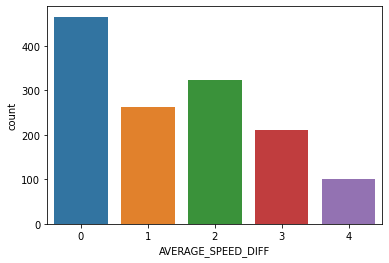

In [152]:
label = 'AVERAGE_SPEED_DIFF'
sns.countplot(x=label, data = y_test)

In [153]:
model = SVC(kernel='rbf', C=3,random_state=2021)
model.fit(x_train, np.ravel(y_train))
predictions=model.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       465
           1       0.67      0.01      0.02       263
           2       0.65      0.69      0.67       324
           3       0.52      0.51      0.52       211
           4       0.73      0.22      0.34       100

    accuracy                           0.60      1363
   macro avg       0.63      0.49      0.46      1363
weighted avg       0.62      0.60      0.52      1363



In [154]:
print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))

0.60 accuracy


In [155]:
param_grid = {'C': [0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
grid = GridSearchCV(SVC(random_state=2021),param_grid,refit=True,verbose=3)
grid.fit(x_train,np.ravel(y_train))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.318 total time=   2.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.318 total time=   2.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.318 total time=   2.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.318 total time=   2.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.319 total time=   2.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.318 total time=   2.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.318 total time=   2.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.318 total time=   2.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.318 total time=   2.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.319 total time=   2.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.683 total time=   1.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [156]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       465
           1       0.65      0.69      0.67       263
           2       0.78      0.72      0.75       324
           3       0.74      0.76      0.75       211
           4       0.89      0.81      0.85       100

    accuracy                           0.79      1363
   macro avg       0.79      0.78      0.78      1363
weighted avg       0.79      0.79      0.79      1363



In [157]:
print("%0.2f accuracy" % (accuracy_score(y_test,grid_predictions)))

0.79 accuracy


In [158]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [159]:
grid_predictions

array([1, 0, 2, ..., 0, 2, 0])

In [160]:
grid_predictions_test = grid.predict(test_prepared)

In [161]:
grid_predictions_test

array([0, 1, 0, ..., 0, 4, 1])

In [162]:
tryCarol = pd.DataFrame(data=grid_predictions_test, index=None, columns=['Speed_Diff'])
tryCarol

,Speed_Diff
0,0
1,1
2,0
3,2
4,0
...,...
1495,0
1496,0
1497,0
1498,4


In [163]:
tryCarol['RowId'] = range(1,1501)
tryCarol['Speed_Diff'].replace({0:"None", 1:"Low", 2:"Medium", 3:"High", 4:"Very_High"}, inplace=True)
tryCarol = tryCarol[['RowId','Speed_Diff']] # Inverter a ordem das colunas para concordar com o formato desejado
tryCarol

,RowId,Speed_Diff
0,1,None
1,2,Low
2,3,None
3,4,Medium
4,5,None
...,...,...
1495,1496,None
1496,1497,None
1497,1498,None
1498,1499,Very_High


In [164]:
try_nr = 1
outputfile = f'carol_try{try_nr}.csv'

tryCarol.to_csv(outputfile,index=False)
submission = pd.read_csv(outputfile,encoding = "ISO-8859-1")
submission

,RowId,Speed_Diff
0,1,None
1,2,Low
2,3,None
3,4,Medium
4,5,None
...,...,...
1495,1496,None
1496,1497,None
1497,1498,None
1498,1499,Very_High


In [167]:
scaler_x = MinMaxScaler(feature_range=(0,1)).fit(x)
x_scaled = pd.DataFrame(scaler_x.transform(x[x.columns]),columns=x.columns)


# Split for test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20, random_state=2021)
y_train=to_categorical(y_train)



scaler_x = MinMaxScaler(feature_range=(0,1)).fit(x)
x_scaled = pd.DataFrame(scaler_x.transform(x[x.columns]),columns=x.columns)
y_train=to_categorical(y)

scaler_x = MinMaxScaler(feature_range=(0,1)).fit(test_prepared)
test_scaled = pd.DataFrame(scaler_x.transform(test_prepared[test_prepared.columns]),columns=test_prepared.columns)



In [177]:
TUNING_DICT = {
    'activation' : ['relu', 'softsign'],
    'learn_rate' : [0.01, 0.001],
    'momentum' : [0.6, 0.8],
    'init_mode' : ['uniform', 'glorot_uniform'] 
}


In [178]:
def build_model(activation='softsign',learn_rate=0.001,momentum=0.6,init_mode='glorot_uniform'):
    model= Sequential()
    model.add(Dense(256,input_dim=x_train.shape[1],activation=activation,kernel_initializer=init_mode))
    model.add(Dense(128,activation=activation,kernel_initializer=init_mode))
    model.add(Dense(64,activation=activation,kernel_initializer=init_mode))
    model.add(Dense(5,activation='sigmoid',kernel_initializer=init_mode))#
    model.compile(
        loss = "binary_crossentropy",
        optimizer = tf.optimizers.Adam(learn_rate,momentum),
        metrics=['accuracy'])
    return model

In [179]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)



In [180]:
kf = KFold(n_splits=3,shuffle=True,random_state=2021)
#RandomizedSearchCV
model = KerasClassifier(build_fn=build_model,epochs=1000,batch_size=80,verbose=0)
grid_search = GridSearchCV(estimator=model,
                          param_grid=TUNING_DICT,
                          cv=kf,
                          refit='True',
                          verbose=1)
grid_search.fit(x_scaled,y_train,validation_split=0.2,verbose=1,callbacks=[es,mc])

Fitting 3 folds for each of 4 candidates, totalling 12 fits


2021-12-15 19:15:34.038945: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-15 19:15:34.039838: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-15 19:15:34.041280: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-12-15 19:15:34.178458: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-15 19:15:34.205012: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


Epoch 1/1000
46/46 [==============================] - 1s 17ms/step - loss: 0.5321 - accuracy: 0.3728 - val_loss: 0.3776 - val_accuracy: 0.5413

Epoch 00001: val_accuracy improved from -inf to 0.54125, saving model to best_model.h5
Epoch 2/1000
46/46 [==============================] - 1s 12ms/step - loss: 0.3505 - accuracy: 0.5899 - val_loss: 0.3490 - val_accuracy: 0.5611

Epoch 00002: val_accuracy improved from 0.54125 to 0.56106, saving model to best_model.h5
Epoch 3/1000
46/46 [==============================] - 1s 13ms/step - loss: 0.3256 - accuracy: 0.6035 - val_loss: 0.3259 - val_accuracy: 0.5853

Epoch 00003: val_accuracy improved from 0.56106 to 0.58526, saving model to best_model.h5
Epoch 4/1000
46/46 [==============================] - 1s 12ms/step - loss: 0.3027 - accuracy: 0.6462 - val_loss: 0.3038 - val_accuracy: 0.6194

Epoch 00004: val_accuracy improved from 0.58526 to 0.61936, saving model to best_model.h5
Epoch 5/1000
46/46 [==============================] - 1s 17ms/step 

GridSearchCV(cv=KFold(n_splits=3, random_state=2021, shuffle=True),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f94d1cc1430>,
             param_grid={'activation': ['relu', 'softsign'],
                         'momentum': [0.6, 0.8]},
             refit='True', verbose=1)

In [181]:


grid_search.best_params_
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))
means=grid_search.cv_results_['mean_test_score']
stds=grid_search.cv_results_['std_test_score']
params=grid_search.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))



Best: 0.782590 using {'activation': 'softsign', 'momentum': 0.8}
0.775837 (0.003955) with: {'activation': 'relu', 'momentum': 0.6}
0.774222 (0.002805) with: {'activation': 'relu', 'momentum': 0.8}
0.778920 (0.004276) with: {'activation': 'softsign', 'momentum': 0.6}
0.782590 (0.005395) with: {'activation': 'softsign', 'momentum': 0.8}


In [182]:


best_mlp_model=grid_search.best_estimator_
def plot_learning_curve(history,metric='accuracy'):
    plt.figure(figsize=(8,4))
    plt.title('Trainnig accuracy vs Validation accuracy')
    plt.plot(history.epoch,history.history['accuracy'],label='train')
    plt.plot(history.epoch,history.history['val_accuracy'],label='val')
    plt.ylabel('Training' + metric)
    plt.xlabel('Epochs')
    plt.legend()



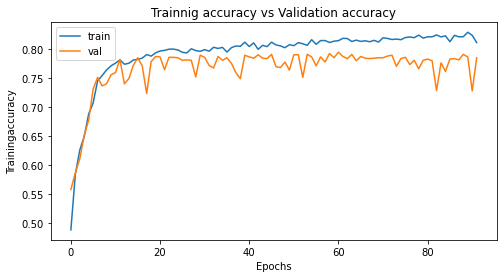

In [183]:
plot_learning_curve(best_mlp_model.model.history, metric='accuracy')

In [184]:
predictions = best_mlp_model.predict(test_scaled)
predictions[:5]

/home/carolina/anaconda3/envs/env_DAA/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 2, 0, 3, 0])

In [185]:
predictions.size

1500

In [188]:
test_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 1   AVERAGE_TIME_DIFF        1500 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 3   LUMINOSITY               1500 non-null   int64  
 4   AVERAGE_TEMPERATURE      1500 non-null   float64
 5   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 6   AVERAGE_HUMIDITY         1500 non-null   float64
 7   AVERAGE_WIND_SPEED       1500 non-null   float64
 8   AVERAGE_CLOUDINESS       1500 non-null   float64
 9   Is_weekend               1500 non-null   int64  
 10  Is_friday                1500 non-null   int64  
 11  dawn                     1500 non-null   uint8  
 12  early afternoon          1500 non-null   uint8  
 13  early morning            1500 non-null   uint8  
 14  evening                 

In [189]:
print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))

ValueError: Found input variables with inconsistent numbers of samples: [1363, 1500]

In [204]:
y_train[:5]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [205]:
predictions

array([0, 2, 0, ..., 0, 4, 2])

In [206]:
tryCarol = pd.DataFrame(data=predictions, index=None, columns=['Speed_Diff'])
tryCarol['RowId'] = range(1,1501)
tryCarol['Speed_Diff'].replace({0:"None", 1:"Low", 2:"Medium", 3:"High", 4:"Very_High"}, inplace=True)
tryCarol = tryCarol[['RowId','Speed_Diff']] # Inverter a ordem das colunas para concordar com o formato desejado
tryCarol

,RowId,Speed_Diff
0,1,None
1,2,Medium
2,3,None
3,4,High
4,5,None
...,...,...
1495,1496,None
1496,1497,None
1497,1498,None
1498,1499,Very_High


In [207]:
try_nr = 2
outputfile = f'carol_try{try_nr}.csv'

tryCarol.to_csv(outputfile,index=False)
submission = pd.read_csv(outputfile,encoding = "ISO-8859-1")
submission

,RowId,Speed_Diff
0,1,None
1,2,Medium
2,3,None
3,4,High
4,5,None
...,...,...
1495,1496,None
1496,1497,None
1497,1498,None
1498,1499,Very_High
